## 6.2 Exploring relationships

### This script contains the following:
    
#### 1. Importing Visualization Libraries and Data

#### 2. Data Cleaning

#### 3. Exploring Relationships

 3.1 correlation Heatmap 
    
 3.2 Scatterplots 

 3.3 Pair plots
    
 3.4 Categorical Plots 
    
#### 4. Q&A 
#### 5. Data Cleaning 2 

### 1. Importing Visualization Libraries and Data¶

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# This option ensures the charts created are displayed without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = '/Users/bente/careerfoundry /exercise_6/02 Data/prepared data'

In [4]:
# Concatenate the directory path and file name
file_path = os.path.join(path, 'complete_years_data.csv')

# Read the CSV file
df = pd.read_csv(file_path)

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the DataFrame
print(df)

                  Country  Year      Continent  Least Developed  \
0                 Albania  2000         Europe            False   
1                 Albania  2001         Europe            False   
2                 Albania  2002         Europe            False   
3                 Albania  2003         Europe            False   
4                 Albania  2004         Europe            False   
5                 Albania  2005         Europe            False   
6                 Albania  2006         Europe            False   
7                 Albania  2007         Europe            False   
8                 Albania  2008         Europe            False   
9                 Albania  2009         Europe            False   
10                Albania  2010         Europe            False   
11                Albania  2011         Europe            False   
12                Albania  2012         Europe            False   
13                Albania  2013         Europe            Fals

### 2. Data Cleaning 

In [6]:
#checking the column names 
df.columns

Index(['Country', 'Year', 'Continent', 'Least Developed', 'Life Expectancy',
       'Population', 'CO2 emissions', 'Health expenditure',
       'Electric power consumption', 'Forest area', 'GDP per capita',
       'Individuals using the Internet', 'Military expenditure',
       'People practicing open defecation',
       'People using at least basic drinking water services',
       'Obesity among adults', 'Beer consumption per capita'],
      dtype='object')

#### Renaming Columns 

In [7]:
# Rename columns whose names are too long

df.rename(columns = {'Individuals using the Internet' : 'Internet Users', 'People practicing open defecation': 'Open Defecation', 
                     'People using at least basic drinking water services': 'Basic Drinking Water Users',
                    'Beer consumption per capita' : 'Per Capita Beer'},
                      inplace = True)

In [8]:
df.head()

Country  Year Continent  Least Developed  Life Expectancy  Population  \
0  Albania  2000    Europe            False           73.955     3089027   
1  Albania  2001    Europe            False           74.288     3060173   
2  Albania  2002    Europe            False           74.579     3051010   
3  Albania  2003    Europe            False           74.828     3039616   
4  Albania  2004    Europe            False           75.039     3026939   

   CO2 emissions  Health expenditure  Electric power consumption  Forest area  \
0       1.026213            7.233370                 1414.703784    28.076642   
1       1.055496            7.139524                 1449.647413    28.123248   
2       1.232379            6.909341                 1351.230796    28.169854   
3       1.338985            7.063490                 1578.165919    28.216460   
4       1.404059            6.773372                 1469.264539    28.263066   

   GDP per capita  Internet Users  Military expenditure  Open Defecation  \
0     3860.804627        0.114097              1.246360         0.888853   
1     4299.546493        0.325798              1.309291         0.836397   
2     4661.402695        0.390081              1.320034         0.781899   
3     5000.049363        0.971900              1.336843         0.728191   
4     5427.732662        2.420388              1.381158         0.675281   

   Basic Drinking Water Users  Obesity among adults  Per Capita Beer  
0                   86.754471                  12.8          1.33431  
1                   86.904070                  13.3          1.48995  
2                   87.451635                  13.9          1.28697  
3                   87.987194                  14.4          1.44830  
4                   88.510583                  15.0          1.37617

#### Missing Values Check

In [9]:
# Check for missing values

df.isnull().sum() 

Country                       0
Year                          0
Continent                     0
Least Developed               0
Life Expectancy               0
Population                    0
CO2 emissions                 0
Health expenditure            0
Electric power consumption    0
Forest area                   0
GDP per capita                0
Internet Users                0
Military expenditure          0
Open Defecation               0
Basic Drinking Water Users    0
Obesity among adults          0
Per Capita Beer               0
dtype: int64

In [10]:
# Displaying all entries with missing values in the 'Electric power consumption' column.
# Set display options to show all rows
pd.set_option('display.max_rows', None)
missing_electric_power = df[df['Electric power consumption'].isna()]
print(missing_electric_power)

Empty DataFrame
Columns: [Country, Year, Continent, Least Developed, Life Expectancy, Population, CO2 emissions, Health expenditure, Electric power consumption, Forest area, GDP per capita, Internet Users, Military expenditure, Open Defecation, Basic Drinking Water Users, Obesity among adults, Per Capita Beer]
Index: []


-> All countries lack of values for "Electric power consumption" in the years 2016-2020. 

In [11]:
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Filter the DataFrame to get rows where 'Obesity among adults' is null
obesity_among_adults = df[df['Obesity among adults'].isnull()]

# Print the filtered DataFrame
print(obesity_among_adults[['Country', 'Year', 'Obesity among adults']])


Empty DataFrame
Columns: [Country, Year, Obesity among adults]
Index: []


-> All countries lack of values for "obesity_among_adults" in the years 2017-2020. 

Because the data set lacks of information for "Obesity among adults" from 2017-2020 and "Electric power consumption"
for the years between 2016 - 2020 I will focus on other variables to get a accurate picture of the most recent years.

### 3. Exploring Relationships

### Correlations:

In [12]:
df.columns

Index(['Country', 'Year', 'Continent', 'Least Developed', 'Life Expectancy',
       'Population', 'CO2 emissions', 'Health expenditure',
       'Electric power consumption', 'Forest area', 'GDP per capita',
       'Internet Users', 'Military expenditure', 'Open Defecation',
       'Basic Drinking Water Users', 'Obesity among adults',
       'Per Capita Beer'],
      dtype='object')

#### crossing all numeric variables

In [13]:
# Convert boolean values to numeric (1 for True, 0 for False)
df['Least Developed'] = df['Least Developed'].map({True: 1, False: 0})

In [14]:
# Create a subset excluding the 'Country', 'Year', 'Continent' columns
sub_df = df[['Least Developed', 'Life Expectancy',
       'Population', 'CO2 emissions', 'Health expenditure',
       'Electric power consumption', 'Forest area', 'GDP per capita',
       'Internet Users', 'Military expenditure', 'Open Defecation',
       'Basic Drinking Water Users', 'Obesity among adults',
       'Per Capita Beer']]


In [15]:
sub_df.head()

Least Developed  Life Expectancy  Population  CO2 emissions  \
0                0           73.955     3089027       1.026213   
1                0           74.288     3060173       1.055496   
2                0           74.579     3051010       1.232379   
3                0           74.828     3039616       1.338985   
4                0           75.039     3026939       1.404059   

   Health expenditure  Electric power consumption  Forest area  \
0            7.233370                 1414.703784    28.076642   
1            7.139524                 1449.647413    28.123248   
2            6.909341                 1351.230796    28.169854   
3            7.063490                 1578.165919    28.216460   
4            6.773372                 1469.264539    28.263066   

   GDP per capita  Internet Users  Military expenditure  Open Defecation  \
0     3860.804627        0.114097              1.246360         0.888853   
1     4299.546493        0.325798              1.309291         0.836397   
2     4661.402695        0.390081              1.320034         0.781899   
3     5000.049363        0.971900              1.336843         0.728191   
4     5427.732662        2.420388              1.381158         0.675281   

   Basic Drinking Water Users  Obesity among adults  Per Capita Beer  
0                   86.754471                  12.8          1.33431  
1                   86.904070                  13.3          1.48995  
2                   87.451635                  13.9          1.28697  
3                   87.987194                  14.4          1.44830  
4                   88.510583                  15.0          1.37617

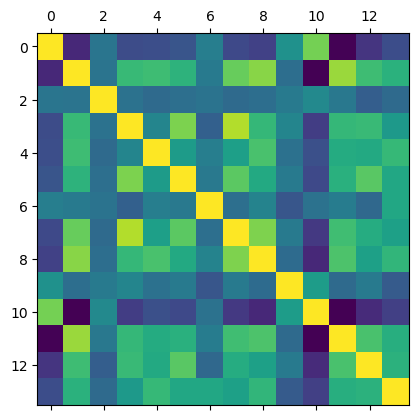

In [16]:
# Calculate correlation matrix
corr_matrix = sub_df.corr()

# Create a heatmap using matshow
plt.matshow(corr_matrix)


'/Users/bente/careerfoundry /exercise_6/03 Scripts'

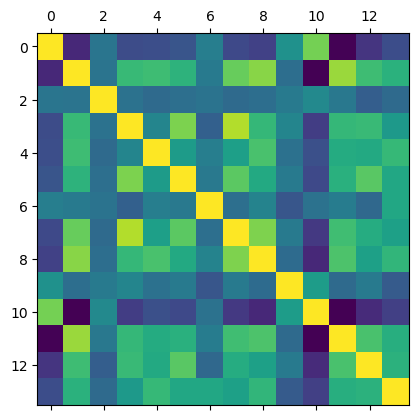

In [17]:
# Save figure
plt.matshow(sub_df.corr())
plt.savefig("correlation_map.png") 

#checking the current dir
cwd = os.getcwd()
cwd

Text(0.5, 1.0, 'Correlation Matrix')

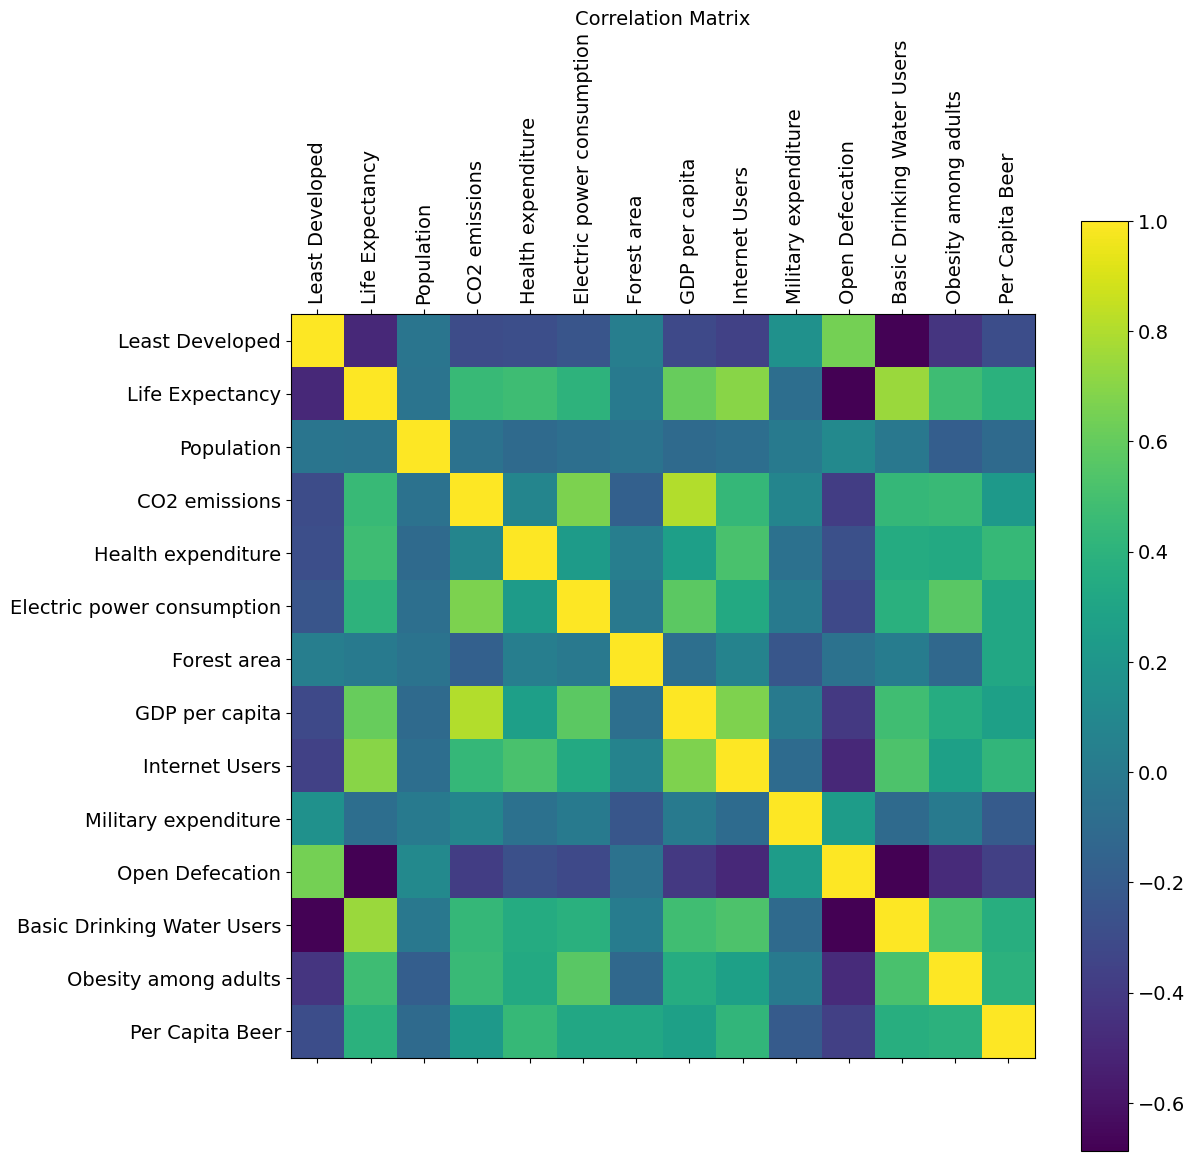

In [18]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(12, 12)) # figure size 
plt.matshow(sub_df.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub_df.shape[1]), sub_df.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(sub_df.shape[1]), sub_df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

##### crossing just most interesting variables

In [19]:
interesting_df = sub_df[['Least Developed', 'Life Expectancy',
       'Health expenditure',
       'GDP per capita',
       'Internet Users', 'Military expenditure', 'Open Defecation',
       'Basic Drinking Water Users',
       'Per Capita Beer','CO2 emissions']]

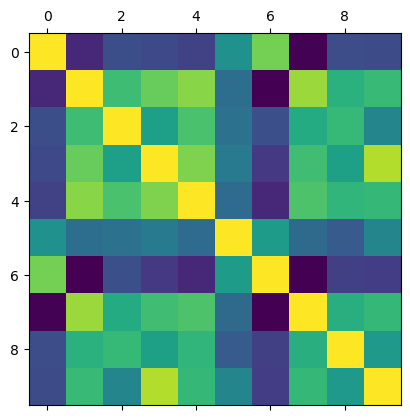

In [20]:
# Calculate correlation matrix
corr_matrix = interesting_df.corr()

# Create a heatmap using matshow
plt.matshow(corr_matrix)


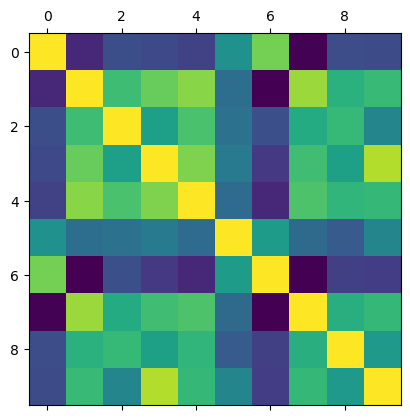

In [21]:
# Save figure
plt.matshow(interesting_df.corr())
plt.savefig("correlation_map_interesting.png") 

Text(0.5, 1.0, 'Correlation Matrix')

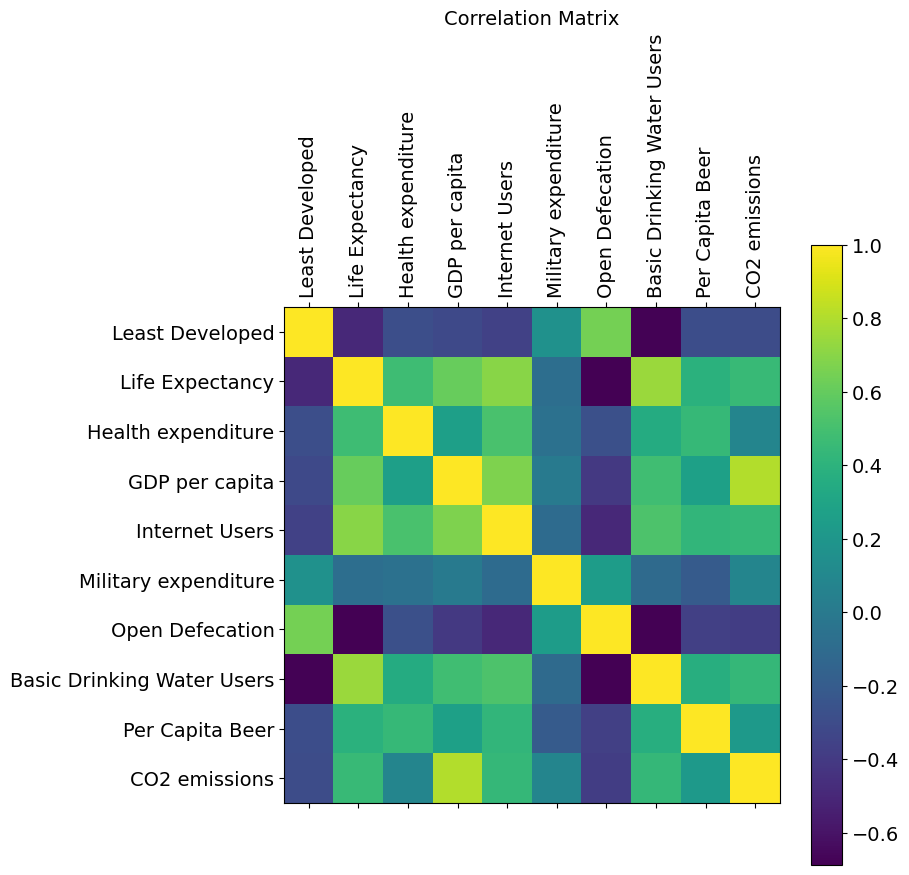

In [22]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(interesting_df.corr(), fignum=f.number) # type of plot
plt.xticks(range(interesting_df.shape[1]), interesting_df.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(interesting_df.shape[1]), interesting_df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

Interpretation of the relationships between variables and "Life Expectancy": 

Internet Users, Basic Drinking Water,GDP per capita and Co2 emissions show the highest positiv relationship, followed by Health Expenditure .Open Defecation and "Least developed" shows the highest
negative relationship. 

### Create a correlation heatmap using seaborn:

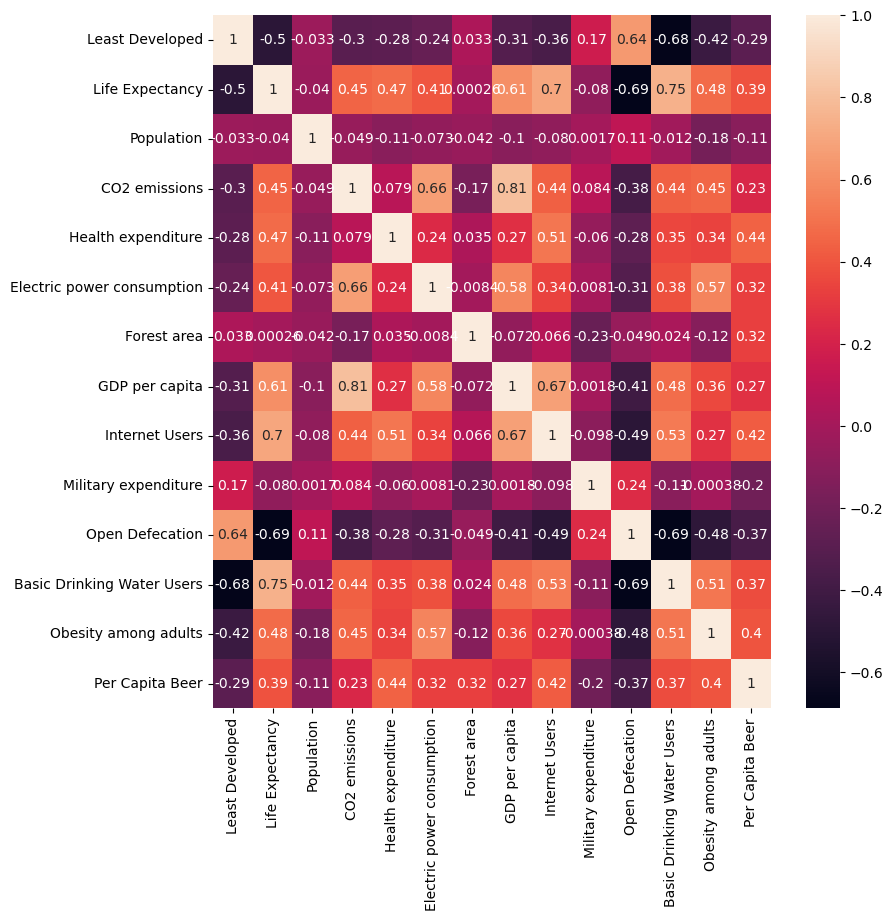

In [23]:
# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(9,9))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub_df.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

Interpretation of the relationships between variables and "Life Expectancy":
    
Basic Drinking Water Users, shows a high positive relationship with a correlation coefficient of 0,75, followed by 
Internet Users (0,7) , Electric power consumption(0,5), Health expenditure(0,48), 
CO2 emissions (0,45). 

The highest negative relationship shows the variable Open Defecation with a correlation coefficient of -0,69 
followed by Least Developed (-0,5). 

The lowest relationship can be observed by Forest Area, Population and Military expenditure. 
All of them are quite close to a correlation coefficient of 0. 

Relationships between other variables: 

There are many high positive and negative relationships based on the correlation coifficient. 

The highest is between CO2 emissions and GDP per capita (0,81), Electric Power Consumption and CO2 emissions(0,7) and Internet Users and GPD per capita(0,67). 

Most variables indicate a relationship with others, expect those coloured in the pink/purple spectrum, they are close to 0. 

In [24]:
# Save figure
f.savefig("correlation_map_seaborn.png") 

In [25]:
# Get the current working directory
cwd = os.getcwd()

print("Current working directory:", cwd)


Current working directory: /Users/bente/careerfoundry /exercise_6/03 Scripts


### Scatterplots 

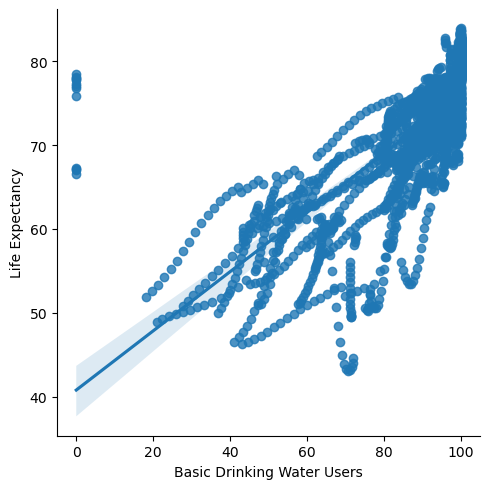

In [26]:
# Create a scatterplot for the "Basic Drinking Water Users" and "Life Expectancy" columns in seaborn

sns.lmplot(x = 'Basic Drinking Water Users', y = 'Life Expectancy', data = df)

-> It shows a relativly strong positive relationship but there are many points far away from the trend line, 
expecially when Basic Drinking Water Users shows the number 60-80. Outliers are observed where Basic Drinking Water Users show the number 0.

-> abundance of data variance was impacting the the correlation coefficient.

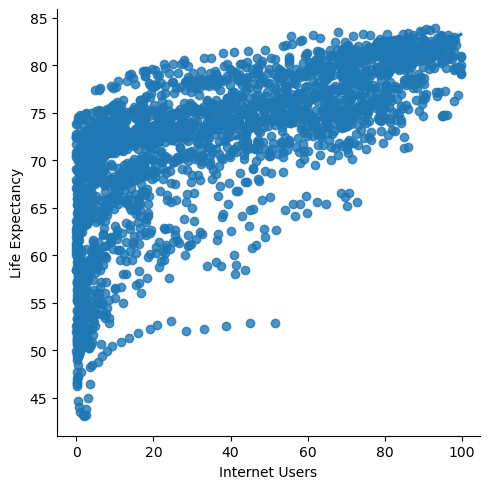

In [27]:
# Create a scatterplot for the "Internet Users" and "Life Expectancy" columns in seaborn
sns.lmplot(x = 'Internet Users', y = 'Life Expectancy', data = df)

The trendline is barley visible because many data point cover it. Still, there are many points far away from this
line. Many data points cluster near the trend line but there’s a great degree of variability too. 

Once Internet User hit the value 60 on the x axis, the Life expectancy doesnt fall under 65. 

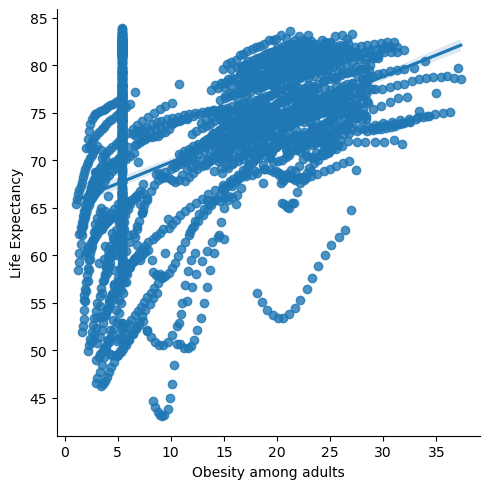

In [28]:
# Create a scatterplot for the "Obesity among adults" and "Life Expectancy" columns in seaborn
sns.lmplot(x = 'Obesity among adults', y = 'Life Expectancy', data = df) 

It shows a relativly strong positive relationship but there are many points far away from the trend line.
Especially from values 0 - 17 on the x axis, the data points show a big variability. After the value 17, the higher 
the values for Obesity among adults get, the more concentrated the data points get, except from some outliers. 

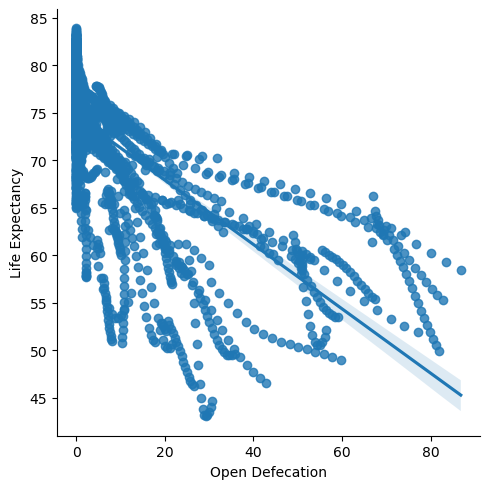

In [29]:
 # Create a scatterplot for the "Open Defecation" and "Life Expectancy" columns in seaborn
sns.lmplot(x = 'Open Defecation', y = 'Life Expectancy', data = df) 

This scatterplot shows a clear downward trend. Especially around the value 0 from the x axis, the Liefe Expectancy 
is very high with concentrated data points. The higher the Open Defecation value gets, the lower the Life Expectancy 
gets. Despite the clear downward trend, the data points show a big variability. 

#### Categorical Plots

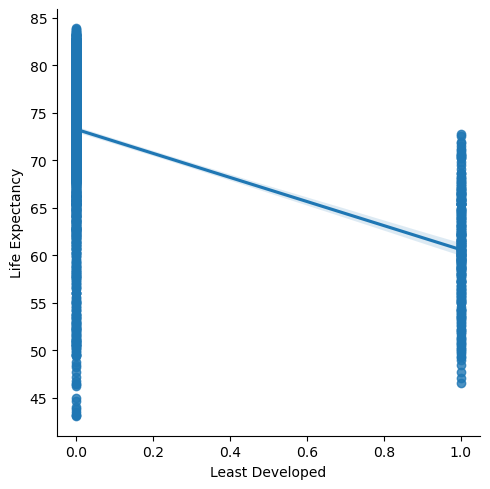

In [30]:
# Create a scatterplot for the "Least Developed" and "Life Expectancy" columns in seaborn
sns.lmplot(x = 'Least Developed', y = 'Life Expectancy', data = df) 

The scatterplots is plotting a categorical variables, so it appears more structured than the numerical ones. the 
value 0.0 stands for developed countries whereas 1.0 stands for least developed countries. 
The data points for developed countries show a higher variety then its counterpart.
The Data points indicate a variety starting with a lower life expectancy but therefor with 
many data points displaying a high Life Expectancy. Least Developed countries have no data points up to the age of
47, but therefore the highest Life Expectancy is 75, whereas the developed Countries reach 85 years. 

#### Pair Plots

In [31]:
# Keepin only the numeric variables in the pair plot 

sub_2 = df[['Least Developed', 'Life Expectancy',
       'Population', 'CO2 emissions', 'Health expenditure',
       'Electric power consumption', 'Forest area', 'GDP per capita',
       'Internet Users', 'Military expenditure', 'Open Defecation',
       'Basic Drinking Water Users', 'Obesity among adults',
       'Per Capita Beer']] 

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

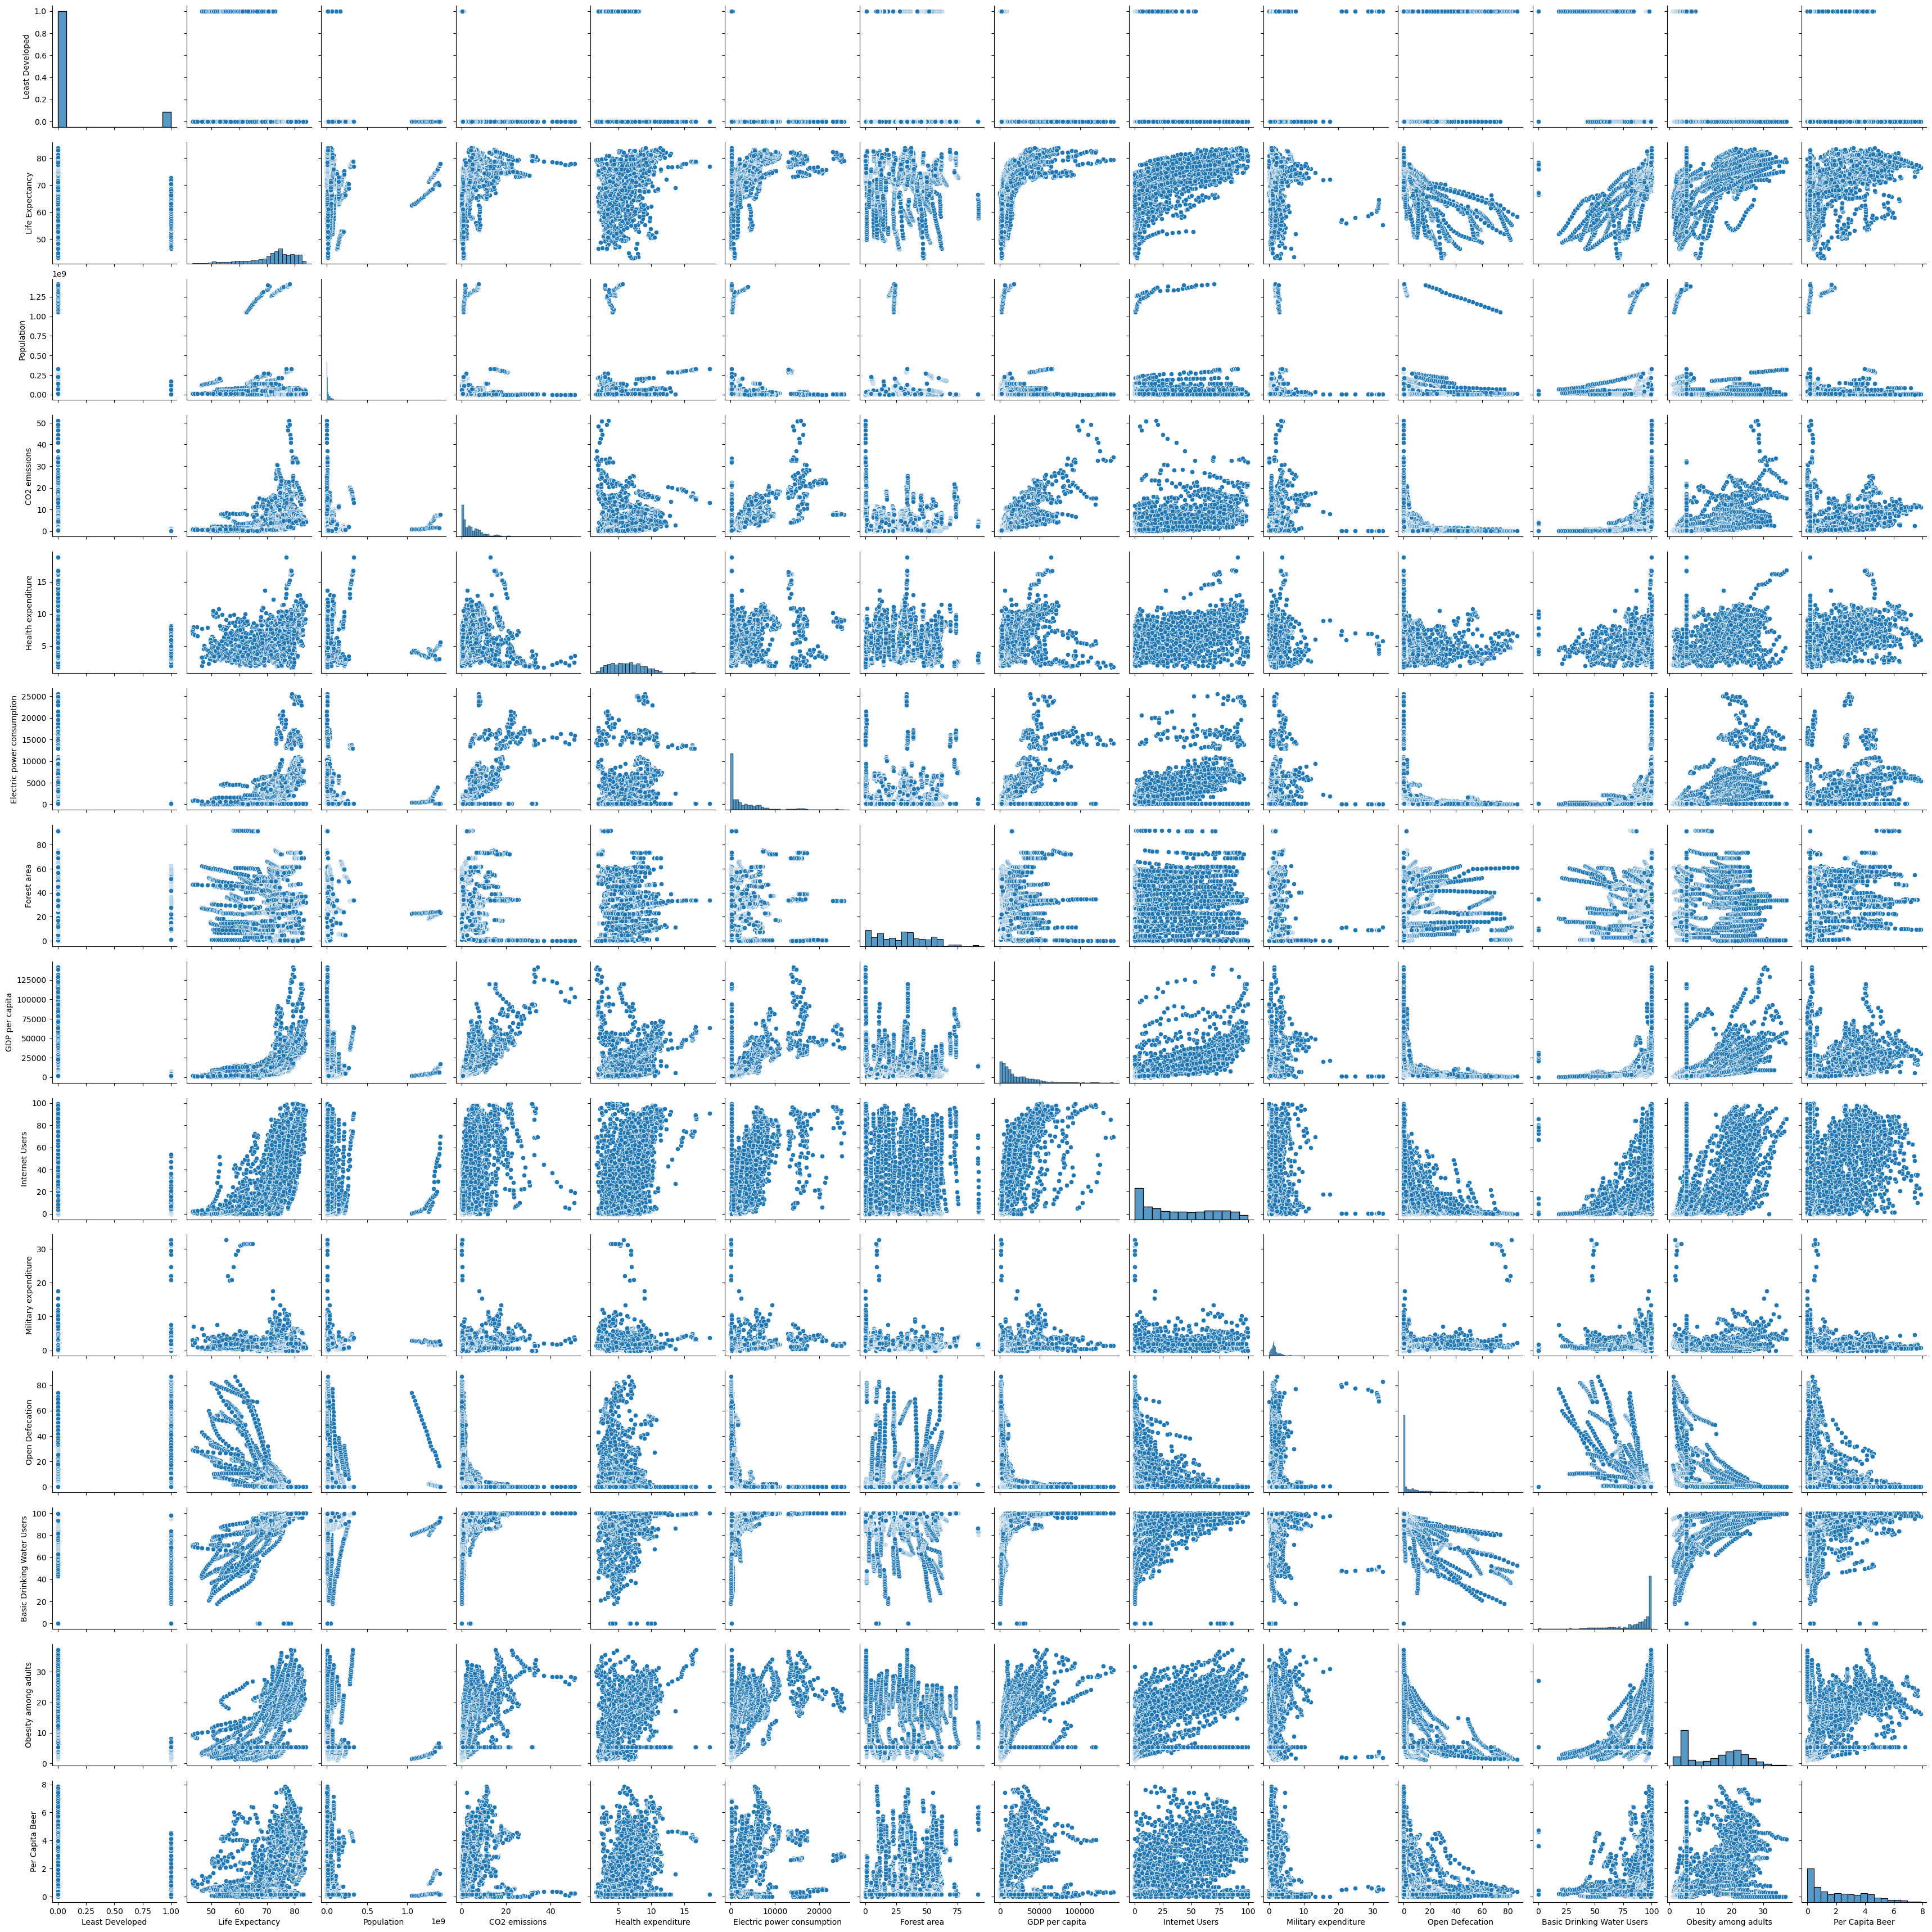

In [32]:
# Create a pair plot 

g = sns.pairplot(sub_2)

### Clear trends 

#### Basic Drinking Water Users:
-As life expectancy surpasses 70, the number of basic drinking water users generally remains above 60, with only a 
few outliers falling below this threshold.
-For life expectancies between 0 and 70, there is greater variability in the number of basic drinking water users,
with many data points ranging between 20 and 60 users.

Thoughts: 

-Healthcare Infrastructure: Regions with longer life expectancies may have more robust healthcare infrastructure, 
 including access to clean drinking water, which could result in higher and more consistent levels of basic 
 drinking water users.
 
-Public Health Initiatives: Public health initiatives and government interventions aimed at improving access to 
    clean drinking water may contribute to reducing variability in basic drinking water users, particularly in 
    regions with longer life expectancies where health and sanitation are prioritized.

#### GDP per Capita
-A notable upward trend in GDP per Capita is observed around the life expectancy age of 70.
-Lower life expectancies are associated with GDP values ranging from 0 to a maximum of 40,000.

Thoughts: 

-Economic Development: Higher life expectancies are often associated with greater economic stability and 
 development. Consequently, countries with longer life expectancies may experience higher GDP per capita 
 due to improved productivity, investment, and overall economic growth.
 
-Healthcare Expenditure: Investments in healthcare systems, which are often correlated with longer life expectancies,
 can also positively impact a country's GDP per capita by enhancing the overall well-being and productivity of 
 its population.

#### Electric Power Consumption:
-Similar to GDP per Capita, electric power consumption exhibits a similar trend.
-Life expectancy ages slightly above 70 show an upward trend in power consumption, with values 
exceeding 10,000 and a maximum of 25,000, while maximum consumption for lower life expectancy ages is around 9,000.

Thoughts: 

-Infrastructure Development: Longer life expectancies may coincide with increased urbanization and infrastructure 
 development, leading to greater demand for electric power consumption in residential, commercial, and industrial 
 sectors.
 
 -Technological Advancements: Advancements in technology and increasing reliance on electronic devices and 
 appliances may drive up electric power consumption, particularly in regions with longer life expectancies where 
 such technologies are more prevalent.
 
 -Quality of Life Improvements: Longer life expectancies may reflect higher standards of living and improved 
 quality of life, contributing to greater consumption of energy for various purposes, including heating, cooling, 
 and entertainment.
    
#### Internet Users Variability:
-As life expectancy exceeds 65, the variability in the number of internet users increases notably beyond 70.

-While a significant portion of data points still falls between 0 and 70 users, an additional range emerges, 
encompassing numbers between 70 and 100 users.

Thoughts: 

-Diverse Demographics: As life expectancy increases, a more diverse demographic, including older individuals, may 
 be accessing the internet, contributing to the variability in user numbers.
 

-Technological Advancements: Advances in technology and infrastructure may facilitate internet access among 
 populations with higher life expectancies, contributing to the variability observed.)

### Observations: 
    
#### Categorical scatterplot: 
    
Only categorical parameter (boolean).
we can see that least developed countries have a near zero value for  co2, electricity and GDP, as if these 3 
define what a least developed country is.
Also in the least developed countries, life expectancy caps around 70, whereas in it can up to 85 in developed 
countries.

#### Population

population seems to be the least interesting parameter among the rest. if we leave out the two most populated 
countries (China and India) which make their own separate clusters of points, we can see that most countries make 
their gradual growth over the years (dense line of dots)
one interesting pair is for example the forest area vs population. here it seems as if the growth in population 
eradicates forrest in most countries. 

### Interesting scatterplots : 
    
#### Health expenditure
The range of health expenditure spans from 0 to 19. For life expectancies exceeding 70 years, a significant
proportion of data points surpass the maximum health expenditure value observed for ages below 70, which is capped 
at 11. Despite this, there isnt a clear trend visible, the variability of the data points is extremly high.

Thoughts: 
    
-Non-Healthcare Determinants: Life expectancy is influenced by a multitude of factors beyond healthcare, including 
 socioeconomic status, education, nutrition, sanitation, and environmental conditions. These non-healthcare 
 determinants may play a significant role in shaping life expectancy outcomes, potentially masking the direct 
 relationship between health expenditure and life expectancy in the scatterplot.


###  Categorical Plots:

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Life Expectancy', ylabel='Count'>

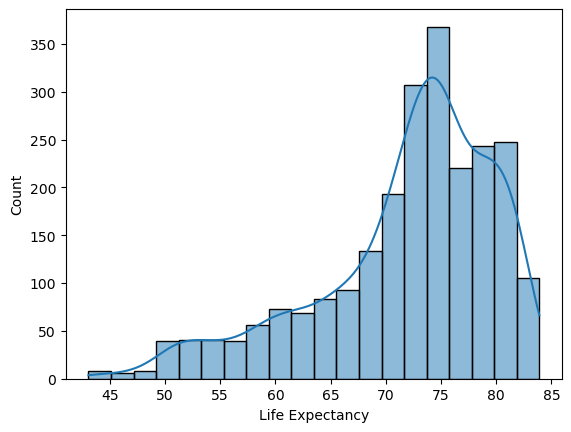

In [33]:
# Use a histogram to visualize the distribution of the variables, to determine sensible categories for the ranges.
# The argument "kde" adds a line that encompasses the distribution

sns.histplot(df['Life Expectancy'], bins = 20, kde = True)

In [34]:
#Categorizing rows in the DataFrame where the 'Life Expectancy' is less than 45 as having a 'Very Low Life 
#Expectancy' and storing this information in a new column called 
#'Life Expectancy category'.
df.loc[df['Life Expectancy'] < 45, 'Life Expectancy category'] = 'Very Low Life Expectancy'

/var/folders/3b/250d_ncn2cb7rf34jj9d3gl40000gq/T/ipykernel_79172/2650735270.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Very Low Life Expectancy' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Life Expectancy'] < 45, 'Life Expectancy category'] = 'Very Low Life Expectancy'


In [35]:
df.loc[(df['Life Expectancy'] >= 45) & (df['Life Expectancy'] < 60), 'Life Expectancy category'] = 'Low Life Expectancy'

In [36]:
df.loc[(df['Life Expectancy'] >= 60) & (df['Life Expectancy'] < 75), 'Life Expectancy category'] = 'Middle Life Expectancy'

In [37]:
df.loc[(df['Life Expectancy'] >= 75) & (df['Life Expectancy'] <= 85), 'Life Expectancy category']= 'High Life Expectancy'

In [38]:
print(df['Life Expectancy category'])

0         Middle Life Expectancy
1         Middle Life Expectancy
2         Middle Life Expectancy
3         Middle Life Expectancy
4           High Life Expectancy
5           High Life Expectancy
6           High Life Expectancy
7           High Life Expectancy
8           High Life Expectancy
9           High Life Expectancy
10          High Life Expectancy
11          High Life Expectancy
12          High Life Expectancy
13          High Life Expectancy
14          High Life Expectancy
15          High Life Expectancy
16          High Life Expectancy
17          High Life Expectancy
18          High Life Expectancy
19          High Life Expectancy
20          High Life Expectancy
21        Middle Life Expectancy
22        Middle Life Expectancy
23        Middle Life Expectancy
24        Middle Life Expectancy
25        Middle Life Expectancy
26        Middle Life Expectancy
27        Middle Life Expectancy
28        Middle Life Expectancy
29        Middle Life Expectancy
30        

In [39]:
df.columns

Index(['Country', 'Year', 'Continent', 'Least Developed', 'Life Expectancy',
       'Population', 'CO2 emissions', 'Health expenditure',
       'Electric power consumption', 'Forest area', 'GDP per capita',
       'Internet Users', 'Military expenditure', 'Open Defecation',
       'Basic Drinking Water Users', 'Obesity among adults', 'Per Capita Beer',
       'Life Expectancy category'],
      dtype='object')

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

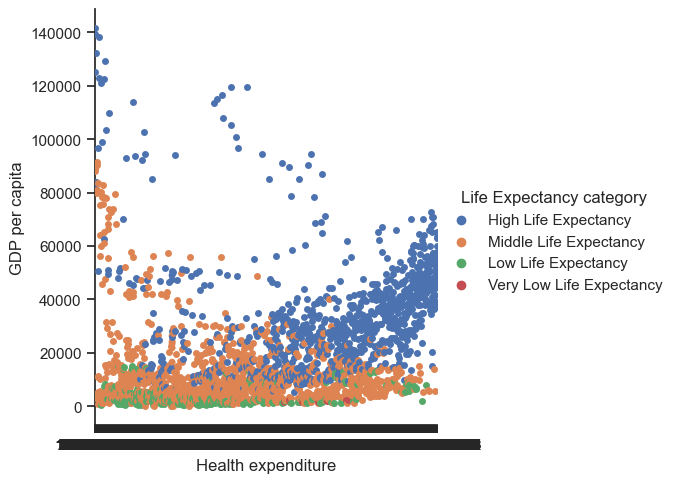

In [40]:
# Create a categorical plot in seaborn using the Life Expectancy categories created above

sns.set(style="ticks")
g = sns.catplot(x="Health expenditure", y="GDP per capita", hue="Life Expectancy category", data=df) 

Interpretation: 

For Low Life Expectancy countries it seems as if health expenditure does not correspond to GDP. It could mean 
that health expenditure reflects more the population rather than health expenditure per capita (because
it is most likely the total of the expenditure). The expenditure in India would be much higher compared to a 
small country, but it does not mean that the smaller country spends less per capita. It seems beneficial to 
calculate the health expenditure per capita in order to see the real effect of health expenditure to real life 
expectancy. 
    

## Q&A 

### Questions I can answer: 
    
#### • What has an impact on the life expectancy?

Which variable shows the strongest correlation with life expectancy? 
 -> First of all its important to note, that while strong correlations exist, it doesn't imply causation. 
    Variables that exhibit a strong correlation may appear to imply causation at first glance but may 
    not have a direct causal relationship. 
        
 -> Basic Drinking Water Users, shows a high positive relationship with a correlation coefficient of 0,75, 
    followed by Internet Users (0,7), Obesity among adults (0,69) , Electric power consumption(0,55), Health           expenditure(0,48), CO2 emissions (0,45). 
    The highest negative relationship shows the variable Open Defecation with a correlation coefficient of             -0,69 followed by Least Developed (-0,5). 
        
####  • What contributes to a higher or lower life expectancy? 

  -> We cant say what contributes to a higher or lower life expectancy at this point of analysis yet, we can just
     observe which variables value correlates with a higher or lower life expectancy. 
        
####  • Does the label “Least Developed” occur more often among countries with a low life expectancy?

   -> Yes, most likely. Based on the visualization its not that easy to see all data points of developed countries.
   ->  Developed countries have a higher variability and CAN reach a life expectancy of 85, whereas least developed
       countries have a maximum of less than 75 years. 
        
####  • Are there any notable differences in life expectancy trends between developed and developing countries, 
####   considering their GDP per capita? 

   -> Yes, the GDP per capita is higher for developed countries. 
    
####  • How does the CO2 emissions level in a country relate to its life expectancy?

   -> There is a clear upward trend, but with a high variability. The higher the life expectancy, the more data            points indicate a high C02 emission. While C02 isnt a good requirement for health, it could correlate with 
       with a high living standard, which often occurs with a good living conditions regarding water acess,sanitary 
       and healthcare. 
        
####  • Do countries which are geographically close to each other have similar life expectancies? 

   -> We would need to map the countries in order to compare the life expectancy of neighbour states. 
    
####   • Does the life expectancy quickly change when other factors change or is it a slow development? 

   -> We need a analysis which includes time as a factor to answer this question. 
        
    

Hypothesis: The higher the health expenditure per capita, the higher the life expectancy of the country. 

## 5. Data Cleaning 2 

### Additional cleaning after analysis 

I conducted some research and came to the conclusion that "electric power consumption" is in kwh per capita and 
"health expenditure" % of GDP. 

In [41]:
# updating column names with units 
df.rename(columns={'Electric power consumption': '"Electricity (kWh/capita)'}, inplace=True)

In [48]:
df.rename(columns={'Health expenditure': 'Health expenditure(% of GDP)'}, inplace=True) 

In [49]:
df.head()

Country  Year Continent  Least Developed  life_expect  Population  \
0  Albania  2000    Europe                0       73.955     3089027   
1  Albania  2001    Europe                0       74.288     3060173   
2  Albania  2002    Europe                0       74.579     3051010   
3  Albania  2003    Europe                0       74.828     3039616   
4  Albania  2004    Europe                0       75.039     3026939   

   CO2_emiss  health_spend(% of GDP)  "Electricity (kWh/capita)  forest_area  \
0   1.026213                7.233370                1414.703784    28.076642   
1   1.055496                7.139524                1449.647413    28.123248   
2   1.232379                6.909341                1351.230796    28.169854   
3   1.338985                7.063490                1578.165919    28.216460   
4   1.404059                6.773372                1469.264539    28.263066   

   gdp_per_capita  Internet Users  military_spend  Open Defecation  \
0     3860.804627        0.114097        1.246360         0.888853   
1     4299.546493        0.325798        1.309291         0.836397   
2     4661.402695        0.390081        1.320034         0.781899   
3     5000.049363        0.971900        1.336843         0.728191   
4     5427.732662        2.420388        1.381158         0.675281   

   Basic Drinking Water Users  adult_obesity  Per Capita Beer  \
0                   86.754471           12.8          1.33431   
1                   86.904070           13.3          1.48995   
2                   87.451635           13.9          1.28697   
3                   87.987194           14.4          1.44830   
4                   88.510583           15.0          1.37617   

  Life Expectancy category  
0   Middle Life Expectancy  
1   Middle Life Expectancy  
2   Middle Life Expectancy  
3   Middle Life Expectancy  
4     High Life Expectancy

In [50]:
# shortening names of columns in dataframe
df.rename(columns={'Population':'population','Country':'country','Year':'year','Continent':'continent','Least Developed':'least_developed','Life Expectancy': 'life_expect','CO2 emissions':'CO2_emiss','"Health expenditure(% of GDP)':'health_spend(% of GDP)','Electricity (kWh/capita)':'electr_consum(kWh/capita)', 'Forest area':'forest_area','GDP per capita':'gdp_per_capita','Individuals using the Internet':'internet_usage','Military expenditure':'military_spend','People practicing open defecation':'open_defecation','People using at least basic drinking water services':'drinking_water_services','Obesity among adults':'adult_obesity','Beer consumption per capita':'beer_consumption'},inplace = True)

In [51]:
# confirming succesful renaming of columns
df.head(5)

country  year continent  least_developed  life_expect  Population  \
0  Albania  2000    Europe                0       73.955     3089027   
1  Albania  2001    Europe                0       74.288     3060173   
2  Albania  2002    Europe                0       74.579     3051010   
3  Albania  2003    Europe                0       74.828     3039616   
4  Albania  2004    Europe                0       75.039     3026939   

   CO2_emiss  health_spend(% of GDP)  "Electricity (kWh/capita)  forest_area  \
0   1.026213                7.233370                1414.703784    28.076642   
1   1.055496                7.139524                1449.647413    28.123248   
2   1.232379                6.909341                1351.230796    28.169854   
3   1.338985                7.063490                1578.165919    28.216460   
4   1.404059                6.773372                1469.264539    28.263066   

   gdp_per_capita  Internet Users  military_spend  Open Defecation  \
0     3860.804627        0.114097        1.246360         0.888853   
1     4299.546493        0.325798        1.309291         0.836397   
2     4661.402695        0.390081        1.320034         0.781899   
3     5000.049363        0.971900        1.336843         0.728191   
4     5427.732662        2.420388        1.381158         0.675281   

   Basic Drinking Water Users  adult_obesity  Per Capita Beer  \
0                   86.754471           12.8          1.33431   
1                   86.904070           13.3          1.48995   
2                   87.451635           13.9          1.28697   
3                   87.987194           14.4          1.44830   
4                   88.510583           15.0          1.37617   

  Life Expectancy category  
0   Middle Life Expectancy  
1   Middle Life Expectancy  
2   Middle Life Expectancy  
3   Middle Life Expectancy  
4     High Life Expectancy

### 6. Export the data frame

In [52]:
#export as pickle
path = '/Users/bente/careerfoundry /exercise_6/02 Data/prepared data'
df.to_pickle(os.path.join(path, 'cleaned_data_26.02.24.pkl'))

In [53]:
#export as csv
df.to_csv(os.path.join(path, 'cleaned_data_26.02.24.csv'), index=False)